<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_01_Intro%2C_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Numpy

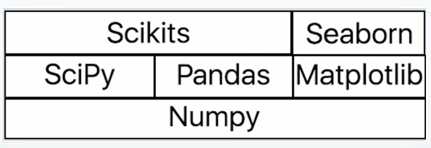

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

## 1.1 Arrays

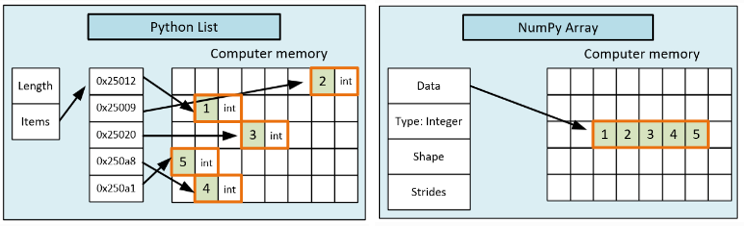

A numpy array represents an n-dimentional grid of values, all of the same type, and is indexed by a tuple of nonnegative integers.

- The number of dimensions is the **rank** of the array
- The **shape** of an array is a tuple of integers giving the size of the array along each dimension

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(f'type={type(a)}, shape={a.shape}, a[1]={a[1]},')

type=<class 'numpy.ndarray'>, shape=(3,), a[1]=2,


In [3]:
a[0] = 5                 # Change an element of the array
a

array([5, 2, 3])

In [4]:
b = np.array([[1,2,3],
              [4,5,6]])   # Create a rank 2 array
print(b)
print('shape =', b.shape)

[[1 2 3]
 [4 5 6]]
shape = (2, 3)


In [5]:
print(b[0, 0], b[0, 1], b[1, 0])

1 2 4


Numpy also provides many functions to create arrays:

In [6]:
np.zeros((2,2))  # Create an array of all zeros

array([[0., 0.],
       [0., 0.]])

In [7]:
np.ones((1,10))   # Create an array of all ones

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [8]:
np.full((3,3), 7.2) # Create a constant array

array([[7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2]])

In [9]:
np.eye(4, dtype=np.int16) # Create an identity matrix of integers

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int16)

In [10]:
np.random.seed(3)   # for reproducibility
t = np.random.random((4,4,3)) # Create a 3d-array filled with random values
t

array([[[0.5507979 , 0.70814782, 0.29090474],
        [0.51082761, 0.89294695, 0.89629309],
        [0.12558531, 0.20724288, 0.0514672 ],
        [0.44080984, 0.02987621, 0.45683322]],

       [[0.64914405, 0.27848728, 0.6762549 ],
        [0.59086282, 0.02398188, 0.55885409],
        [0.25925245, 0.4151012 , 0.28352508],
        [0.69313792, 0.44045372, 0.15686774]],

       [[0.54464902, 0.78031476, 0.30636353],
        [0.22195788, 0.38797126, 0.93638365],
        [0.97599542, 0.67238368, 0.90283411],
        [0.84575087, 0.37799404, 0.09221701]],

       [[0.6534109 , 0.55784076, 0.36156476],
        [0.2250545 , 0.40651992, 0.46894025],
        [0.26923558, 0.29179277, 0.4576864 ],
        [0.86053391, 0.5862529 , 0.28348786]]])

In [11]:
t[1,1,2]

0.558854087990882

### 1.1.1 Rank-1 Arrays

In `numpy` **rank-1** arrays of length `n` have a shape of `(n,)`. Such arrays are somewhat special in that `numpy` can treat them both as column or as row vectors.



In [12]:
# A rank-1 array
a1 = np.array([1,2,3])
print(f'a1 {a1.shape}:\n', a1)

a1 (3,):
 [1 2 3]


In [13]:
# A columns vector (1 column and "-1" rows means "figure it out")
a_col = a1.reshape(-1, 1)
print(f'a_col {a_col.shape}:\n', a_col)

a_col (3, 1):
 [[1]
 [2]
 [3]]


In [14]:
# A row vector (1 row and "-1" columns)
a_row = a1.reshape(1, -1)
print(f'a_row {a_row.shape}=\n', a_row)

a_row (1, 3)=
 [[1 2 3]]


Rank-1 arrays have different semantics when using them in vector-vector or vector-matrix products, so always make sure you known what shapes you're working with:

In [15]:
print('a1 * a1 =', np.dot(a1, a1))

print('a_row * a1 =', np.dot(a_row, a1))

print('a1 * a_col =', np.dot(a1, a_col))

print('a_row * a_col =', np.dot(a_row, a_col))
print('a_col * a_row =\n', np.dot(a_col, a_row))

a1 * a1 = 14
a_row * a1 = [14]
a1 * a_col = [14]
a_row * a_col = [[14]]
a_col * a_row =
 [[1 2 3]
 [2 4 6]
 [3 6 9]]


## 1.2 Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [16]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

x.dtype, y.dtype, z.dtype

(dtype('int64'), dtype('float64'), dtype('int64'))

## 1.3 Array math

### 1.3.1 Elementwise operations
Basic mathematical functions **operate elementwise** on arrays, and are available both as operator overloads and as functions in the numpy module:

In [17]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [18]:
# Elementwise difference
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [19]:
# Elementwise product
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [20]:
# Elementwise division
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [21]:
# Elementwise square root
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


There are of course many more elementwise operations inmplemented by `numpy`.

### 1.3.2 Inner (scalar) product

`*` is elementwise multiplication, not matrix multiplication (as we say above).

We instead use the `dot()` function to:
- compute inner products of vectors,
- multiply a vector by a matrix, and to
- multiply matrices.

The `dot()` function is available both as a function in the numpy module and as an instance
method of array objects.

$a \cdot b = a_0 \times b_0 + a_1 \times b_1 + \dots$

In [22]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

219
219
219


In [23]:
x = np.array([[1,2],[3,4]])
print('x=\n', repr(x))

# Matrix-vector product; produce a rank 1 array
print('x dot v=', x.dot(v))

x=
 array([[1, 2],
       [3, 4]])
x dot v= [29 67]


In [24]:
# Matrix-matrix product; produces a rank 2 array
y = np.array([[5,6],[7,8]])
print('y=\n', repr(y))

print('x dot y =\n', x.dot(y))

y=
 array([[5, 6],
       [7, 8]])
x dot y =
 [[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [25]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1) ) # Compute sum of each row

10
[4 6]
[3 7]


Apart from computing mathematical functions using arrays, we frequently need to **reshape** or otherwise manipulate data in arrays.

In [26]:
# Transpose
print(x)
print(x.T)
print(np.transpose(x))

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


In [27]:
v = np.array([1,2,3]) # rank 1
print(v.reshape(1, -1)) # row vector
print(v.reshape(-1, 1)) # column vector

[[1 2 3]]
[[1]
 [2]
 [3]]


### 1.3.3 Slicing

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify **a slice for each dimension** of the array:

In [28]:
import numpy as np
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [29]:
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

A slice of an array is a **view** into the same in-memory data, so modifying it will modify the original array.

In [30]:
b[0, 0] = 77777
a

array([[    1, 77777,     3,     4],
       [    5,     6,     7,     8],
       [    9,    10,    11,    12]])

You can also mix integer indexing with slice indexing.
However, doing so will yield an array of **lower rank** than the original array.

In [31]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [32]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a

print(row_r1, 'shape=', row_r1.shape)
print(row_r2, 'shape=', row_r2.shape)
print(row_r3, 'shape=', row_r3.shape)

[5 6 7 8] shape= (4,)
[[5 6 7 8]] shape= (1, 4)
[[5 6 7 8]] shape= (1, 4)


In [33]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


### 1.3.4 Add padding (border)

In [65]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
b = np.zeros((a.shape[0]+2, a.shape[1]+2))
b[1:-1,1:-1] = a
print(b)

[[1 2 3]
 [4 5 6]]
(2, 3)
[[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 0. 0. 0. 0.]]


## 1.4 Array indexing (advanced)

Numpy offers several ways to index into arrays.

### 1.4.1 Integer array indexing

- When you slice, the resulting array view will always be a subarray of the original array.
- Integer array indexing allows you to construct arbitrary arrays using the data from another array.


In [34]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [35]:
# An example of integer array indexing.
# The returned array will have shape (3,)
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [36]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [37]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [38]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
a[np.arange(4), b]

array([ 1,  6,  7, 11])

In [39]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 1000
a

array([[1001,    2,    3],
       [   4,    5, 1006],
       [1007,    8,    9],
       [  10, 1011,   12]])

###1.4.2 Boolean array indexing

This type of indexing is used to select the elements of an array that satisfy some condition.

In [40]:
a = np.array([[1,2], [3, 4], [5, 6]])
print('a=\n', repr(a))
bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

bool_idx

a=
 array([[1, 2],
       [3, 4],
       [5, 6]])


array([[False, False],
       [ True,  True],
       [ True,  True]])

In [41]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
a[a>2]

array([3, 4, 5, 6])

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

## 1.5 Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of **different shapes** when performing arithmetic operations.

Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [42]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

print('x=', x)
print('v=', v)

x= [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
v= [1 0 1]


In [43]:
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [44]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
vv

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [45]:
y = x + vv  # Add x and vv elementwise
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [46]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting

print('shapes: ', x.shape, v.shape)
y

shapes:  (4, 3) (3,)


array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. All input arrays with ndim smaller than the input array of largest ndim, have 1’s prepended to their shapes.
1. The size in each dimension of the output shape is the maximum of all the input sizes in that dimension.
1. An input can be used in the calculation if its size in a particular dimension either matches the output size in that dimension, or has value exactly 1.
1. If an input has a dimension size of 1 in its shape, the first data entry in that dimension will be used for all calculations along that dimension. In other words, the stepping machinery of the ufunc will simply not step along that dimension (the stride will be 0 for that dimension).


Here are some applications of broadcasting:

In [47]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)

# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
np.reshape(v, (3, 1)) * w

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

In [48]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
x * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18],
       [20, 22, 24]])

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.